<a href="https://colab.research.google.com/github/nmeena2/astro_assignments/blob/main/414_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import matplotlib.pyplot as plt


from astropy.io import fits


Mounted at /content/gdrive


In [ ]:
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
import astropy.units as u
from astropy.coordinates import Angle, Latitude, Longitude
from astropy.io import ascii
from astropy.table import Table

data = fits.open('/content/gdrive/MyDrive/lab1-data.fits')

data1 = data[1].data

data1['RA'].shape
ix = np.array(range(1000))


In [ ]:
RA = data1['RA']
DEC = data1['DEC']
z= data1['REDSHIFT']

ascii.write([ix, RA, DEC], 'radecz.txt', names = ['name','RA', 'DEC'], overwrite = True)


In [ ]:
result = ascii.read('/content/gdrive/MyDrive/result (2).csv')


In [ ]:

ras, decs = result['ra'], result['dec']

ind = result['name']
z_sdss = z[ind]

iband = result['modelMag_i']

In [ ]:
coord = SkyCoord(ras, decs, frame = 'icrs', unit = 'deg')

drad = coord.dec.radian


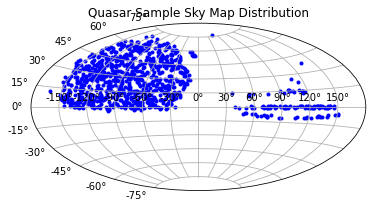

In [ ]:

plt.subplot(1,1,1, projection="aitoff")
plt.grid()
plt.title('Quasar Sample Sky Map Distribution')

ra_rad = coord.ra.radian + 0.5*np.pi
ra_rad[ra_rad > np.pi] -= 2*np.pi

plt.scatter(ra_rad, drad, color = 'b', marker = '.')


In [ ]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM

(0.0, 5.0)

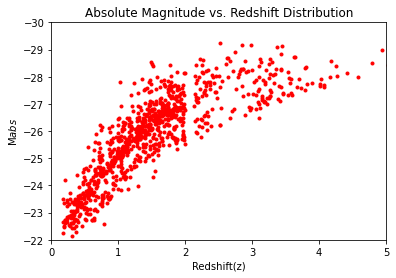

In [ ]:
cosmo = FlatLambdaCDM(H0= 70, Om0= 0.3)

ldist = cosmo.luminosity_distance(z_sdss)

lpar = ldist.value*1e6
mod = 5*np.log10(lpar/10)

plt.scatter(z_sdss, iband - mod, color = 'r', marker = '.')
plt.title('Absolute Magnitude vs. Redshift Distribution')
plt.ylabel('M$abs$')
plt.xlabel('Redshift(z)')

plt.ylim(-22, -30)
plt.xlim(0, 5)